### Machine Learining Assignment
 I decided to choose this dermatology dataset because I have dermatology/immunological disease called psoriasis.Hence, I thought it would be fun to try a machine learning algorithm on a dataset. I decided to use the https://archive.ics.uci.edu/ml/datasets/Dermatologydataset dataset.

The dataset that I decided to choose has 34 feature variables that describe one of six diseases. Since I have psoriasis myself, I decided that I am going to try to pick psoriasis with the dataset. In order to do so I had to create a binary Y variable where 0 = no psoriasis and 1= has psoriasis.Since, there are so many possible X features and psiorisis is the most common possible outcome, I decided to remove all the histology features and age to make it more difficult to find a conclusion. I also decided to remove 'History' because in my personal case I didn't have medical history until after my diagnosis(due to my mother being adopted).Therefore we are left with the following features. X_Features: 1: erythema 2: scaling 3: definite borders 4: itching 5: koebner phenomenon 6: polygonal papules 7: follicular papules 8: oral mucosal involvement 9: knee and elbow involvement 10: scalp involvement All features follow the scale given by the dataset description. "Every other feature (clinical and histopathological) was given a degree in the range of 0 to 3. Here, 0 indicates that the feature was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative intermediate values."

In [111]:
import pandas as pd

#Read the data
df = pd.read_csv(r'dermatology.data', header = None)
col =  ['erythema' ,'scaling' ,'definite borders' , 
       'itching' ,'koebner phenomenon' ,'polygonal papules' 
       ,'follicular papules' ,'oral mucosal involvement'
       ,'knee and elbow involvement','scalp involvement']

In [112]:
X = df.iloc[:,:len(col)]
X.columns = col
X.head()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement
0,2,2,0,3,0,0,0,0,1,0
1,3,3,3,2,1,0,0,0,1,1
2,2,1,2,3,1,3,0,3,0,0
3,2,2,2,0,0,0,0,0,3,2
4,2,3,2,2,2,2,0,2,0,0


In [113]:
#view the distribution of our X features
concat_series = [X[column].value_counts() for column in X.columns]
value_counts = pd.concat(concat_series, axis=1)
value_counts

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement
0,4,8,59,118,224,297,333,299,251,264
1,57,111,93,72,70,1,11,9,28,30
2,215,195,168,100,54,41,16,45,64,56
3,90,52,46,76,18,27,6,13,23,16


## Observation
Notice that all of our X-features are between 0-4 so we won't have to do any feature scaling to make it for even between groups.

<AxesSubplot:>

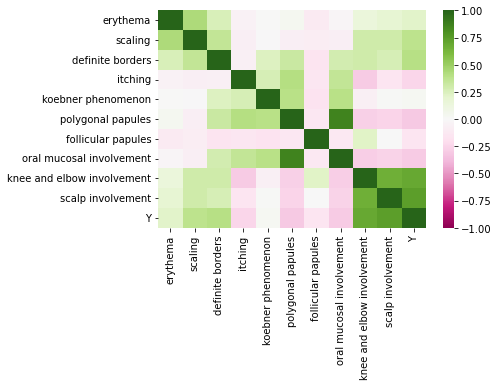

In [117]:
import seaborn as sns
## Plot a heatmap
sns.heatmap(X.corr(),vmin = -1,vmax = 1,cmap = 'PiYG')

## Observation
Scalp involvment and knee and elbow involvment are the two most co-related categories.
Everything else appears to be generally independant of each other.
Let take a look at the features with respect to y now.

In [118]:
#define the y variable

Y = (df[34] == 1).astype(int).values
X['Y'] = Y

<AxesSubplot:>

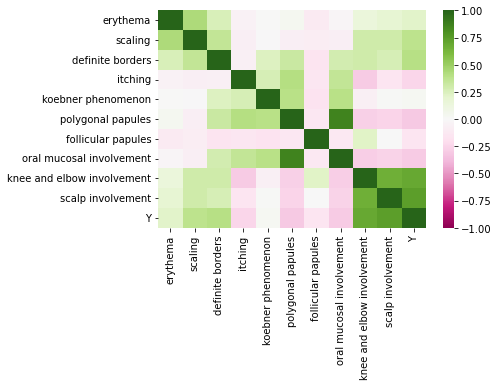

In [119]:
##Reshow the corelation with respect to Y
sns.heatmap(X.corr(),vmin = -1,vmax = 1,cmap = 'PiYG')

## Observation
Now that we adding our predicted variable, reploting our corelation matrix shows us that our Y is actually corelated with scalp, elbow/knee involvement! This makes sense because it is a common area for psiorisis.

Now lets take a closer look into each feature.

<AxesSubplot:xlabel='erythema', ylabel='Count'>

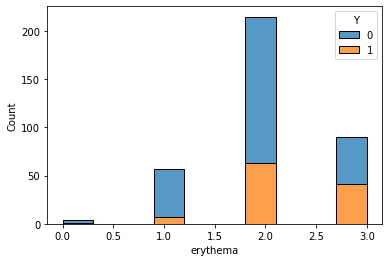

In [120]:
sns.histplot(X, x = col[0],hue = 'Y', multiple = 'stack')

It seems that erythema is common in psiorisis but also common in other diseases

<AxesSubplot:xlabel='scaling', ylabel='Count'>

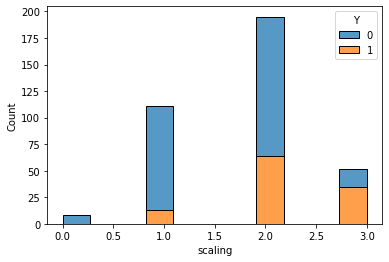

In [121]:
sns.histplot(X, x = col[1],hue = 'Y', multiple = 'stack')

Scaling is a defining feature in psiorisis but it seems that many of the other diseases in the dataset also share that same feature.

<AxesSubplot:xlabel='definite borders', ylabel='Count'>

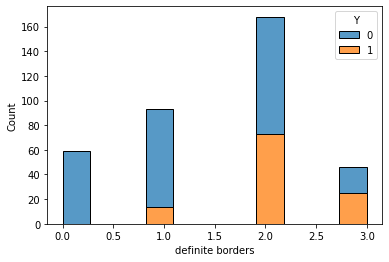

In [122]:
sns.histplot(X, x = col[2],hue = 'Y', multiple = 'stack')

Psiorisis and other diseases have definite borders. Psiorisis usually have it, as they are actually reporting 0 in 0. 

<AxesSubplot:xlabel='itching', ylabel='Count'>

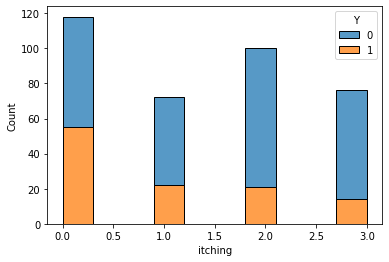

In [123]:
sns.histplot(X, x = col[3],hue = 'Y', multiple = 'stack')

Itchings distribution is relatively spread out between all the categories

<AxesSubplot:xlabel='koebner phenomenon', ylabel='Count'>

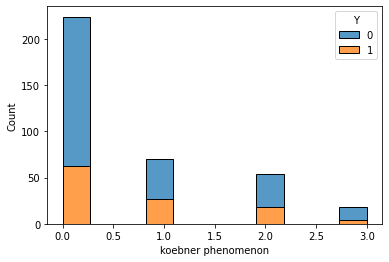

In [124]:
sns.histplot(X, x = col[4],hue = 'Y', multiple = 'stack')

Koebnor phenomenon seems to be a relatively uncommon feature in all categories.

<AxesSubplot:xlabel='polygonal papules', ylabel='Count'>

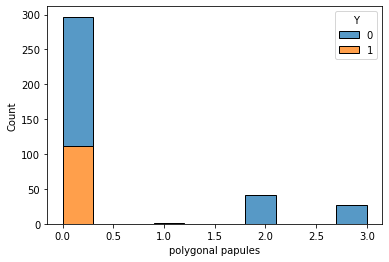

In [125]:
sns.histplot(X, x = col[5],hue = 'Y', multiple = 'stack')

This features seems to not appear at all in the psirosisi group

<AxesSubplot:xlabel='follicular papules', ylabel='Count'>

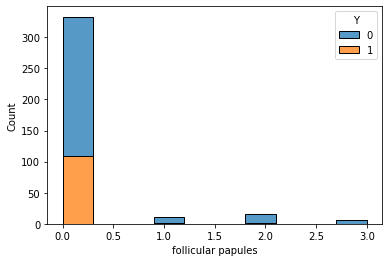

In [126]:
sns.histplot(X, x = col[6],hue = 'Y', multiple = 'stack')

This features seems to not appear at all in the psirosisi group

<AxesSubplot:xlabel='oral mucosal involvement', ylabel='Count'>

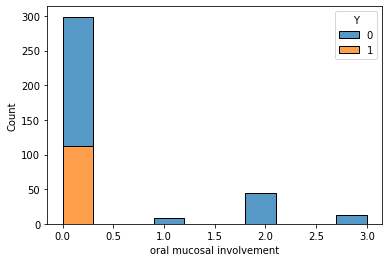

In [127]:
sns.histplot(X, x = col[7],hue = 'Y', multiple = 'stack')

This features seems to not appear at all in the psirosisi group

<AxesSubplot:xlabel='knee and elbow involvement', ylabel='Count'>

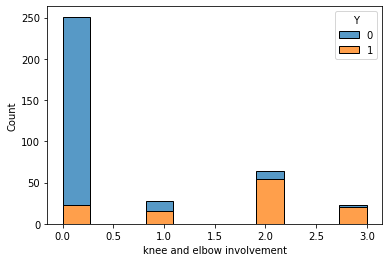

In [128]:
sns.histplot(X, x = col[8],hue = 'Y', multiple = 'stack')

Very common in patients with psiorisis as we could expect from our corelation plot

<AxesSubplot:xlabel='scalp involvement', ylabel='Count'>

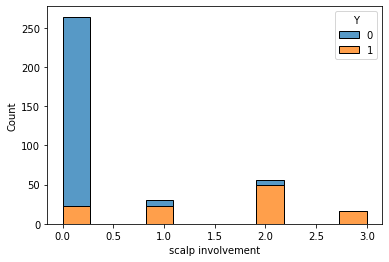

In [129]:
sns.histplot(X, x = col[9],hue = 'Y', multiple = 'stack')

Very common in patients with psiorisis as we could expect from our corelation plot

## kfolds and model cross validation

In [130]:
from sklearn.model_selection

SyntaxError: invalid syntax (Temp/ipykernel_19880/3444808156.py, line 1)

In [131]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#set up kfolds
kfold = KFold(n_splits=5,random_state=0,shuffle=True)
# Model comparision
from sklearn.linear_model import LogisticRegression
from  sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

logistic= LogisticRegression()
linear = LinearRegression()
decision = DecisionTreeClassifier()
KNN = KNeighborsClassifier()
#add them to array
array = [linear,logistic,decision,KNN]
names = ['linear', 'logistic', 'decision', 'KNN']

In [132]:
X = X.drop(columns = ['Y'])
for i in range(4):
    results = cross_val_score(array[i],X,Y,cv = kfold)
    print(names[i]+"-"+"Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

linear-Accuracy: 70.478% (3.353%)
logistic-Accuracy: 94.806% (1.605%)
decision-Accuracy: 92.625% (1.633%)
KNN-Accuracy: 93.987% (1.403%)


Since our logistic model achieve the best accuracy we are going to start by modeling a logistic model.
## Model Fit 1: Logistic Model

In [133]:
import numpy as np
#set up for param fitting
param = param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(logistic,param_grid = param,cv=3,verbose =True,n_jobs = -1)

best_conf = clf.fit(X,Y)


Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


C:\Users\jesse\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.69398907 ...        nan 0.93715847 0.93715847]
  warnings.warn(
C:\Users\jesse\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [134]:
print(best_conf.best_estimator_)

LogisticRegression(C=0.615848211066026, penalty='l1', solver='saga')


In [135]:
print (f'Accuracy - : {best_conf.score(X,Y):.3f}')

Accuracy - : 0.967


In [136]:
from sklearn.model_selection import train_test_split
#define test split
X_train, X_test, y_train, y_test = train_test_split(X, Y)
score_array = []
for i in range(10):
    lr = LogisticRegression(C = 0.615848211066026,penalty = 'l1', solver = 'saga')
    lr.fit(X_train,y_train)
    Y_pred = lr.predict(X_test)
    print('Test set accuracy: ',metrics.accuracy_score(y_test, Y_pred))
    score_array.append(metrics.accuracy_score(y_test, y_pred))
score_array = np.array(score_array)
  

Test set accuracy:  0.967391304347826
Test set accuracy:  0.967391304347826
Test set accuracy:  0.967391304347826
Test set accuracy:  0.967391304347826
Test set accuracy:  0.967391304347826
Test set accuracy:  0.967391304347826
Test set accuracy:  0.967391304347826
Test set accuracy:  0.967391304347826
Test set accuracy:  0.967391304347826
Test set accuracy:  0.967391304347826


C:\Users\jesse\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\jesse\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\jesse\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\jesse\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\jesse\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

In [137]:
from sklearn.metrics import confusion_matrix 
print(confusion_matrix(y_test, Y_pred))

[[54  0]
 [ 3 35]]


Only a few false positives/negatives

## Model 2 : Decision Tree Classifier

In [138]:
from sklearn.model_selection import RandomizedSearchCV
from  sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth' : (3,5,7,9,10,15,20,25)
              , 'criterion' : ('gini', 'entropy')
              , 'max_features' : ('auto', 'sqrt', 'log2')
              , 'min_samples_split' : (2,4,6)
             }
dc =DecisionTreeClassifier()
DT_grid  = RandomizedSearchCV(dc,param_distributions = parameters, cv = 5, verbose = True)
DT_grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': (3, 5, 7, 9, 10, 15, 20,
                                                      25),
                                        'max_features': ('auto', 'sqrt',
                                                         'log2'),
                                        'min_samples_split': (2, 4, 6)},
                   verbose=True)

In [139]:
print(DT_grid.best_estimator_)

DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='auto',
                       min_samples_split=6)


In [140]:
score_array = []
for i in range(10):
    dt = DecisionTreeClassifier(max_depth =20, max_features = 'log2',min_samples_split=6)
    dt.fit(X_train,y_train)
    y_pred = dt.predict(X_test)
    print('Test set accuracy: ',metrics.accuracy_score(y_test, y_pred))
    score_array.append(metrics.accuracy_score(y_test, y_pred))
score_array = np.array(score_array)


Test set accuracy:  0.9239130434782609
Test set accuracy:  0.9456521739130435
Test set accuracy:  0.9130434782608695
Test set accuracy:  0.9130434782608695
Test set accuracy:  0.8913043478260869
Test set accuracy:  0.9347826086956522
Test set accuracy:  0.8804347826086957
Test set accuracy:  0.9347826086956522
Test set accuracy:  0.9347826086956522
Test set accuracy:  0.9239130434782609


In [141]:
print('Test set mean accuracy: ',score_array.mean())
print(confusion_matrix(y_test, y_pred))

Test set mean accuracy:  0.9195652173913043
[[52  2]
 [ 5 33]]


## Final Model: KNN

In [142]:
##Hyper parameters

In [143]:
from sklearn.model_selection import GridSearchCV
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)
g_res = gs.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [144]:
g_res.best_score_

0.9561634018155757

In [145]:
g_res.best_params_

{'metric': 'minkowski', 'n_neighbors': 7, 'weights': 'distance'}

In [146]:
#Fit the model!
score_array = []
for i in range(10):
    knn = KNeighborsClassifier(metric = 'minkowski',n_neighbors = 5, weights = 'distance')
    knn.fit(X_train,y_train)
    y_knn = knn.predict(X_test)
    print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn))
    score_array.append(metrics.accuracy_score(y_test, y_knn))
print(score_array)

Test set accuracy:  0.9565217391304348
Test set accuracy:  0.9565217391304348
Test set accuracy:  0.9565217391304348
Test set accuracy:  0.9565217391304348
Test set accuracy:  0.9565217391304348
Test set accuracy:  0.9565217391304348
Test set accuracy:  0.9565217391304348
Test set accuracy:  0.9565217391304348
Test set accuracy:  0.9565217391304348
Test set accuracy:  0.9565217391304348
[0.9565217391304348, 0.9565217391304348, 0.9565217391304348, 0.9565217391304348, 0.9565217391304348, 0.9565217391304348, 0.9565217391304348, 0.9565217391304348, 0.9565217391304348, 0.9565217391304348]


In [148]:
score_array = np.array(score_array)
score_array.mean()
print(confusion_matrix(y_test, y_knn))

[[54  0]
 [ 4 34]]


## Final Observation 
All of our models had an average of over 90% successful predictions. Our models performed well on the test set so we can assume that the model isn't extremly overfit. However, if someone decided to use these modelling techniques but started adding in other diseases that can cause red inflamed skin or changed the disribution of disease type, the accuracy may fall off because the model would be better fit towards this particular dataset. 

I am pretty happy with the performance of these models especially when not having acccess to labratory or family history(which is particularly important in individuals with psiorisis). If those features were added in, it would increase the accuracy of the model to near 100%.